## Loan Default Risk using EDA
- Conducted exploratory data analysis (EDA) on a loan dataset to identify patterns related to loan default.
- Used statistical techniques and visualizations to understand the relationship between various customer characteristics and the likelihood of default.
- Identified which types of customers were most likely to default on their loans, based on factors such as income, credit score, and employment status.
- Presented findings in a clear and actionable manner, making recommendations for how the company could mitigate loan default risk.

In [2]:
# Import python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# It will display all columns
pd.set_option("display.max_columns",None)

### Checking the dataset

In [5]:
# Reading and inspection
inp0 = pd.read_csv("/Users/sakshimunde/Downloads/loan.csv")

### Data Understanding

In [6]:
inp0

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
inp0.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Cleaning

In [8]:
# seeing number of null values in each column in percentage

round(100*(inp0.isnull().sum()/len(inp0.index)),3)

id                              0.000
member_id                       0.000
loan_amnt                       0.000
funded_amnt                     0.000
funded_amnt_inv                 0.000
                               ...   
tax_liens                       0.098
tot_hi_cred_lim               100.000
total_bal_ex_mort             100.000
total_bc_limit                100.000
total_il_high_credit_limit    100.000
Length: 111, dtype: float64

In [9]:
# seeing columns that have null values more than 30%

null_columns = inp0.columns[100*(inp0.isnull().sum()/len(inp0.index))>30]
null_columns

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [10]:
# dropping columns that have null values more than 30%
inp0 = inp0.drop(null_columns,axis=1)


In [11]:
inp0.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [12]:
# summarising each row null values
inp0.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [13]:
# summarising rows having more than 5 null values
len(inp0[inp0.isnull().sum(axis=1)>5].index)

0

In [14]:
inp0.shape

(39717, 53)

In [15]:
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [16]:
# dropping columns that are not useful for further analysis

inp0 = inp0.drop(["delinq_2yrs","earliest_cr_line", "inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util",
"total_acc","out_prncp", "out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
"total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d",
"application_type"],axis=1)

In [17]:
# determining the number of rows and columns
inp0.shape

(39717, 32)

In [18]:
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


In [19]:
# dropping colums that are notuseful for further analysis

inp0 = inp0.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code',
              'initial_list_status','collections_12_mths_ex_med','zip_code','addr_state','url','title',
                  'pymnt_plan','emp_title', 'pub_rec_bankruptcies'],axis=1)

In [20]:
# Let's see the dimension
inp0.shape

(39717, 18)

In [21]:
# checking the data types

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_length           38642 non-null  object 
 11  home_ownership       39717 non-null  object 
 12  annual_inc           39717 non-null  float64
 13  verification_status  39717 non-null  object 
 14  issue_d              39717 non-null  object 
 15  loan_status          39717 non-null 

#### Converting data types

In [22]:
# converting interest rate datatype 
inp0['int_rate'] = inp0['int_rate'].str.rstrip('%')
inp0['int_rate']=inp0['int_rate'].astype(float)
inp0['int_rate'].dtype

dtype('float64')

In [23]:
# Converting data type of term column 
inp0['term'] = inp0['term'].str.rstrip()
inp0['term'] = inp0['term'].str.split().str[0]

In [24]:
inp0['term'] = inp0['term'].astype('int')
inp0.term.dtype

dtype('int64')

In [25]:
# Changing term column name to term months
inp0.rename(columns = {'term':'term_months'},inplace=True)


In [26]:
# extracting month and year from issue_d column 
inp0['issue_d'] = pd.to_datetime(inp0['issue_d'],format ="%b-%y")
inp0['issue_month'] = inp0['issue_d'].dt.month
inp0['issue_year'] = inp0['issue_d'].dt.year
inp0['issue_month']


0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_month, Length: 39717, dtype: int64

In [27]:
inp0['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 39717, dtype: int64

In [28]:
# Seeing unique values in emp length
inp0.emp_length.unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [29]:
# Checking  null values in emp length
inp0 = inp0[~inp0.emp_length.isnull()]
inp0.emp_length.isnull().sum()

0

In [30]:
# replacing emp length values to 0 ,10 and blank spaces
inp0['emp_length'] = inp0['emp_length'].str.replace('+','')
inp0['emp_length'] = inp0['emp_length'].str.replace('<1 year','0')
inp0['emp_length'] = inp0['emp_length'].str.replace('year','')
inp0['emp_length'] = inp0['emp_length'].str.replace('years','')
inp0['emp_length'] = inp0['emp_length'].str.replace('n/a','10')
inp0['emp_length'] = inp0['emp_length'].str.replace('<','')



In [31]:
inp0['emp_length'] = inp0['emp_length'].str.rstrip()
inp0['emp_length'] = inp0['emp_length'].str.split().str[0]

In [32]:
# Converting emp length to numeric
inp0['emp_length'] = pd.to_numeric(inp0['emp_length'])

In [33]:
# seeing the count of emp length
inp0['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [34]:
# Checking whether there are null values or not 
inp0.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term_months            0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
issue_month            0
issue_year             0
dtype: int64

In [35]:
# Summarising the loan status values
inp0['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [36]:
# Converting loan status to category
inp0['loan_status']=inp0['loan_status'].astype('category')

In [37]:
# we dont have use of "current" of loan status 

inp0 = inp0[inp0['loan_status']!='Current']

In [38]:
# seeing the count of loan status
inp0['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current            0
Name: loan_status, dtype: int64

In [39]:
# Making Fully paid to 0 and charged off to 1 for making further analysis easy

inp0['loan_status'] = inp0['loan_status'].apply(lambda x : 0 if x=='Fully Paid' else 1)
inp0.loan_status.value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [40]:
# Converting loan status to numeric 
inp0['loan_status']= pd.to_numeric(inp0['loan_status'])
inp0['loan_status'].dtype

dtype('int64')

##### Deriving Insights 

## Univariate unordered Categorical varaiables analysis

In [41]:
inp0.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,12,2011


In [42]:
# summarising loan status statistically
inp0.loan_status.describe()

count    37544.000000
mean         0.143805
std          0.350896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

- average default rate is 14%

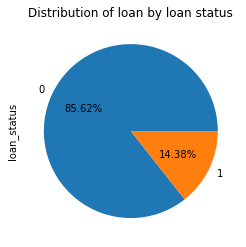

In [43]:
# loan variable analysis

inp0.loan_status.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Distribution of loan by loan status')
plt.show()

- we can see there are 14% of defaulters are there and fully paid are 85%

In [44]:
# home ownership variable analysis

inp0.home_ownership.value_counts(normalize=True)*100

RENT        48.151502
MORTGAGE    44.201470
OWN          7.378010
OTHER        0.261027
NONE         0.007991
Name: home_ownership, dtype: float64

In [45]:
# lets replace None value to Rent values

inp0['home_ownership'] = inp0['home_ownership'].str.replace('NONE','RENT')
inp0['home_ownership'].value_counts()

RENT        18081
MORTGAGE    16595
OWN          2770
OTHER          98
Name: home_ownership, dtype: int64

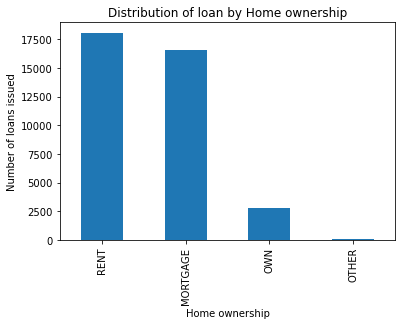

In [46]:
# plot bar graph to see the distribution of loan by home ownership  

inp0.home_ownership.value_counts().plot.bar()
plt.title('Distribution of loan by Home ownership')
plt.xlabel('Home ownership')
plt.ylabel('Number of loans issued')
plt.show()

- most of the loan applicants stay on rent and mortgage

In [47]:
# verification status analysis
inp0.verification_status.value_counts(normalize=True)*100

Not Verified       43.357128
Verified           31.355210
Source Verified    25.287662
Name: verification_status, dtype: float64

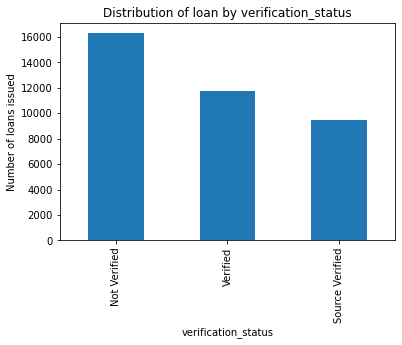

In [48]:
# distribution of loan by verification status
inp0.verification_status.value_counts().plot.bar()
plt.title('Distribution of loan by verification_status')
plt.xlabel('verification_status')
plt.ylabel('Number of loans issued')
plt.show()

- most of the applicant's not verified there income

In [49]:
# distribution of loan by purpose
inp0['purpose'].value_counts(normalize=True)*100

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64

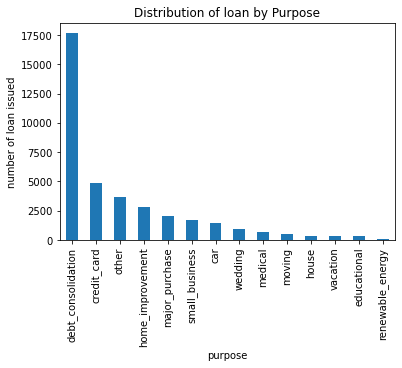

In [50]:
# plot bar graph to see the loan distribution by purpose 
inp0['purpose'].value_counts().plot.bar()
plt.title('Distribution of loan by Purpose')
plt.xlabel('purpose')
plt.ylabel('number of loan issued')
plt.show()

- mostly purpose of taking loan is debt consolidation

### Univariate ordered categorical data analysis

In [51]:
# distribution of loan by term months

inp0.term_months.value_counts()

36    28287
60     9257
Name: term_months, dtype: int64

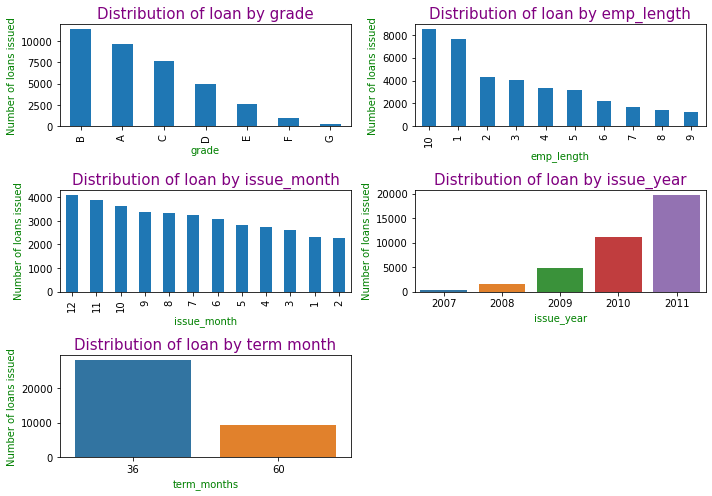

In [52]:
# distribution of loan by grade
plt.figure(figsize=[10,7])

plt.subplot(3,2,1)
inp0.grade.value_counts().plot.bar()
plt.title('Distribution of loan by grade',fontdict={'fontsize':'15','color':'Purple'})
plt.xlabel('grade',fontdict={'fontsize':'10','color':'Green'})
plt.ylabel('Number of loans issued',fontdict={'fontsize':'10','color':'Green'})


# Distribution of loan by emp_length
plt.subplot(3,2,2)
inp0['emp_length'].value_counts().plot.bar()
plt.title('Distribution of loan by emp_length',fontdict={'fontsize':'15','color':'Purple'})
plt.xlabel('emp_length',fontdict={'fontsize':'10','color':'Green'})
plt.ylabel('Number of loans issued',fontdict={'fontsize':'10','color':'Green'})


#distribution of loan by issue_month
plt.subplot(3,2,3)
inp0['issue_month'].value_counts().plot.bar()
plt.title('Distribution of loan by issue_month',fontdict={'fontsize':'15','color':'Purple'})
plt.xlabel('issue_month',fontdict={'fontsize':'10','color':'Green'})
plt.ylabel('Number of loans issued',fontdict={'fontsize':'10','color':'Green'})

# analysis of issue_year variable
plt.subplot(3,2,4)
sns.countplot(data = inp0,x='issue_year')
plt.title("Distribution of loan by issue_year",fontdict={'fontsize':'15','color':'Purple'})
plt.xlabel('issue_year',fontdict={'fontsize':'10','color':'Green'})
plt.ylabel('Number of loans issued',fontdict={'fontsize':'10','color':'Green'})

# analysis of term month variable
plt.subplot(3,2,5)
sns.countplot(data=inp0,x='term_months')
plt.title("Distribution of loan by term month",fontdict={'fontsize':'15','color':'Purple'})
plt.xlabel('term_months',fontdict={'fontsize':'10','color':'Green'})
plt.ylabel("Number of loans issued",fontdict={'fontsize':'10','color':'Green'})

plt.tight_layout()
plt.show()

- 1.highest number of loans are B & A grade loans and least number of loans are F & G graded
- 2.more number of loans are taken by employess who have 10 years of experience 
- 3.12th month has the highest number of loans issued 
- 4.2011 is ther year where most number of loans are issued
- 5.most of the applicants are of 36 term month

Text(0, 0.5, 'Number of loans issued')

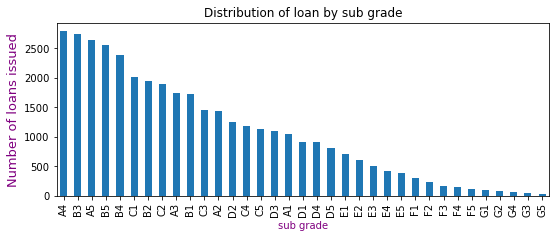

In [53]:
# distribution of loan by sub_grade 
plt.figure(figsize=[30,7])
plt.subplot(2,3,5)
inp0.sub_grade.value_counts().plot.bar()
plt.title('Distribution of loan by sub grade')
plt.xlabel('sub grade',fontdict={'fontsize':'10','color':'Purple'})
plt.ylabel('Number of loans issued',fontdict={'fontsize':'13','color':'Purple'})



- highest number of loans are A4,B3,A5,B4 and least are G1,G2,G3,G4,G5

### Univariate numerical analysis

In [54]:

inp0.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,12,2011


In [55]:
# summarising loan amount statistically

inp0.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

50% of loan amount is 10,000

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

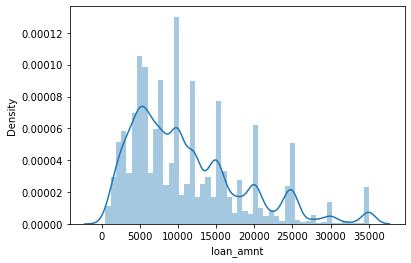

In [56]:
# distplot of loan amount
sns.distplot(inp0['loan_amnt'])

In [57]:
# easiest way to analyse is by making bins
# binning loan amount into low ,medium,high,very high
def loan_amount(n):
    if n<5000:
        return 'low'
    elif n>=5000 and n<15000:
        return 'medium'
    elif n>=15000 and n<25000:
        return 'high'
    else:
        return 'very high'

In [58]:
# Converting loan amount to bins 
inp0['loan_amnt'] = inp0.loan_amnt.apply(lambda x : loan_amount(x))

In [59]:
inp0.loan_amnt.value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

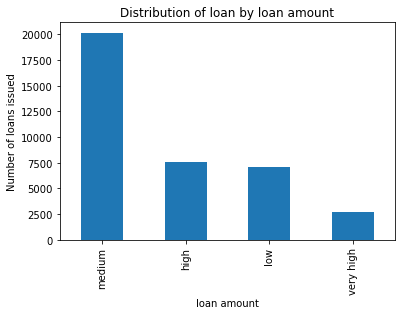

In [60]:
# seeing loan by loan amount using bar plot
inp0.loan_amnt.value_counts().plot.bar()
plt.title('Distribution of loan by loan amount')
plt.xlabel('loan amount')
plt.ylabel('Number of loans issued')
plt.show()

- so medium(5k-15k) is the highest around 20,000 amount was distributed 

In [61]:
# analysing funded amount.Converting funded amount to bins
inp0['funded_amnt'] = inp0.funded_amnt.apply(lambda x : loan_amount(x))

In [62]:
# seeing count of funded amount
inp0['funded_amnt'].value_counts()

medium       20625
high          7416
low           7188
very high     2315
Name: funded_amnt, dtype: int64

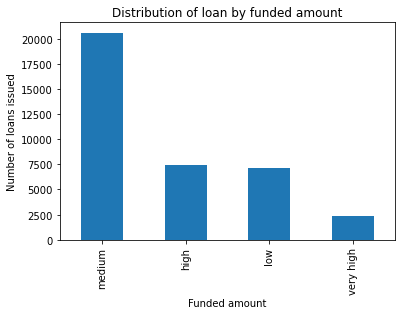

In [63]:
# bar plot of loan amount by funded amount
inp0.funded_amnt.value_counts().plot.bar()
plt.title('Distribution of loan by funded amount')
plt.xlabel('Funded amount')
plt.ylabel('Number of loans issued')
plt.show()

- so 5k - 15k amount was funded more

In [64]:
#converting funded_amnt_inv to bins
inp0.funded_amnt_inv

0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 37544, dtype: float64

In [65]:
# converting funded amount inv to bins
inp0['funded_amnt_inv'] = inp0['funded_amnt_inv'].apply(lambda x : loan_amount(x))

In [66]:
inp0['funded_amnt_inv'].value_counts()

medium       20510
low           9040
high          6658
very high     1336
Name: funded_amnt_inv, dtype: int64

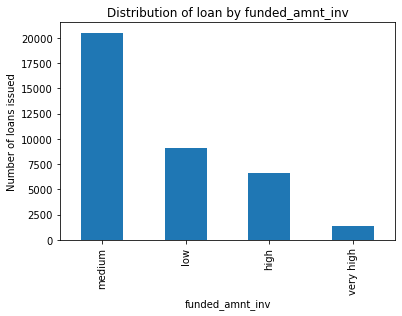

In [67]:
# plot bar graph of loan data using funded amount_inv
inp0['funded_amnt_inv'].value_counts().plot.bar()
plt.title('Distribution of loan by funded_amnt_inv')
plt.xlabel('funded_amnt_inv')
plt.ylabel('Number of loans issued')
plt.show()

- most invested amount is around 5k - 15k 

In [68]:
# seeing unique values of interest rate
inp0.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49,  7.9 , 18.64, 21.28, 12.69, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 20.89, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  5.42,  8.49, 10.59, 17.49,
       15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69,
       20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49,
       13.84, 22.94, 24.4 , 21.48, 14.82,  7.29, 17.88, 20.11, 16.02,
       13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37, 14.17,
       16.4 , 17.51,  7.66, 10.74,  5.79,  6.92, 10.  ,  9.63, 14.54,
       12.68, 18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74,
       20.48,  6.91,

In [69]:
# converting interest rate to bins to low,medium,high

def interest_rate(n):
    if n<=10:
        return 'low'
    elif n>10 and n<15:
        return 'medium'
    else:
        return 'high'

In [70]:
inp0['int_rate'] = inp0['int_rate'].apply(lambda x : interest_rate(x))
inp0['int_rate']

0        medium
1          high
2          high
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: int_rate, Length: 37544, dtype: object

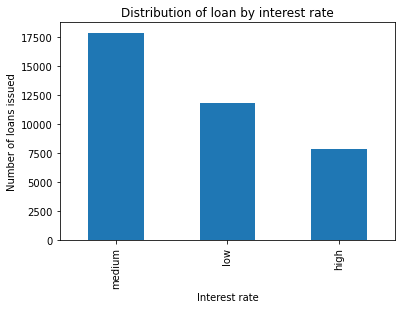

In [71]:
# plotting bar graph to see loan by interest rate
inp0['int_rate'].value_counts().plot.bar()
plt.title('Distribution of loan by interest rate')
plt.xlabel('Interest rate')
plt.ylabel('Number of loans issued')
plt.show()

- loans with medium(10-15%) of interest are issued most

In [72]:
#converting debt to income variable value's to bins to low,medium,high
inp0.dti

0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 37544, dtype: float64

In [73]:
# defining function to bin dti to low ,medium and high
def dti_1(n):
    if n<=10:
        return 'low'
    elif n>10 and n<=20:
        return 'medium'
    else:
        return 'high'

In [74]:
# applying defined function to dti to convert into bins
inp0['dti'] = inp0['dti'].apply(lambda x : dti_1(x))

In [75]:
# seeing the count of dti
inp0['dti'].value_counts()

medium    18002
low       12545
high       6997
Name: dti, dtype: int64

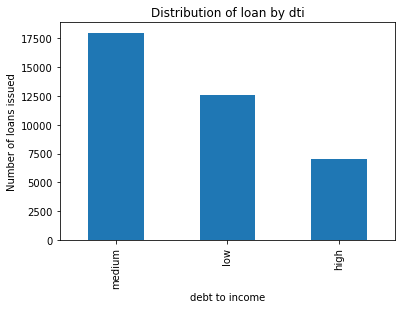

In [76]:
# bar plot to see the distribution of loan by dti
inp0['dti'].value_counts().plot.bar()
plt.title('Distribution of loan by dti')
plt.xlabel('debt to income')
plt.ylabel('Number of loans issued')
plt.show()

In [77]:
# converting installment column to bins to low,medium,high,very high
inp0.installment
def installment_1(n):
    if n<200:
        return 'low'
    elif n>=200 and n<400:
        return 'medium'
    elif n>=400 and n<600:
        return 'high'
    else:
        return 'very high'

In [78]:
# applying defined function to installment to convert into bins
inp0['installment'] = inp0['installment'].apply(lambda x: installment_1(x))

In [79]:
inp0['installment'].value_counts()

medium       14390
low          12544
high          6458
very high     4152
Name: installment, dtype: int64

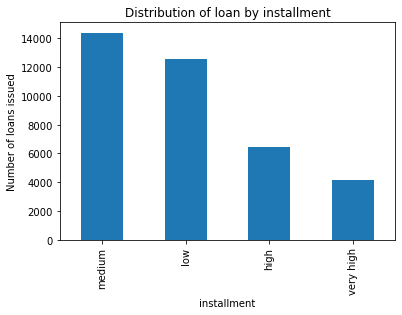

In [80]:
inp0['installment'].value_counts().plot.bar()
plt.title('Distribution of loan by installment')
plt.xlabel('installment')
plt.ylabel('Number of loans issued')
plt.show()

In [81]:
# converting annual_inc to bins to low ,medium,high,very high
inp0.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [82]:
inp0.annual_inc.describe().apply(lambda x : format(x,'f'))

count      37544.000000
mean       69407.080230
std        64676.984485
min         4000.000000
25%        41000.000000
50%        60000.000000
75%        83000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [83]:
# converting annual income to bins 
def annual_income(n):
    if n<50000:
        return 'low'
    elif n>=50000 and n<100000:
        return 'medium'
    elif n>=100000 and n<150000:
        return 'high'
    else:
        return 'very high'

In [84]:
inp0['annual_inc'] = inp0['annual_inc'].apply(lambda x : annual_income(x))


In [85]:
inp0['annual_inc'].value_counts()

medium       17947
low          13669
high          4236
very high     1692
Name: annual_inc, dtype: int64

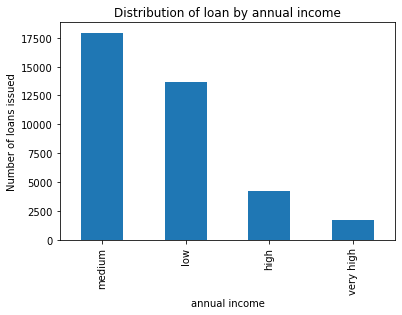

In [86]:
inp0.annual_inc.value_counts().plot.bar()
plt.title('Distribution of loan by annual income')
plt.xlabel('annual income')
plt.ylabel('Number of loans issued')
plt.show()

## Bivariate  and Multivariate analysis

In [87]:
inp0.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,issue_year
0,1077501,1296599,medium,medium,low,36,medium,low,B,B2,10,RENT,low,Verified,2011-12-01,0,credit_card,high,12,2011
1,1077430,1314167,low,low,low,60,high,low,C,C4,1,RENT,low,Source Verified,2011-12-01,1,car,low,12,2011


In [88]:
#Defaulters count on Home ownership 
inp0.groupby('home_ownership')['loan_status'].count()

home_ownership
MORTGAGE    16595
OTHER          98
OWN          2770
RENT        18081
Name: loan_status, dtype: int64

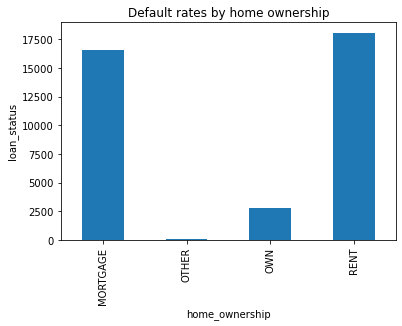

In [89]:
# bar plot to see defaulters by home ownership
inp0.groupby('home_ownership')['loan_status'].count().plot.bar()
plt.title('Default rates by home ownership')
plt.ylabel('loan_status')
plt.show()

- more number of defaulters are from Rent and Mortgage.Lenders should be careful while giving loan to borrowers of home ownership as rent and mortgage

In [90]:
#number of defaulters by purpose 
inp0.groupby('purpose')['loan_status'].mean()

purpose
car                   0.107044
credit_card           0.104103
debt_consolidation    0.151570
educational           0.164038
home_improvement      0.118492
house                 0.166667
major_purchase        0.101442
medical               0.153963
moving                0.152174
other                 0.160517
renewable_energy      0.191489
small_business        0.270175
vacation              0.143678
wedding               0.100767
Name: loan_status, dtype: float64

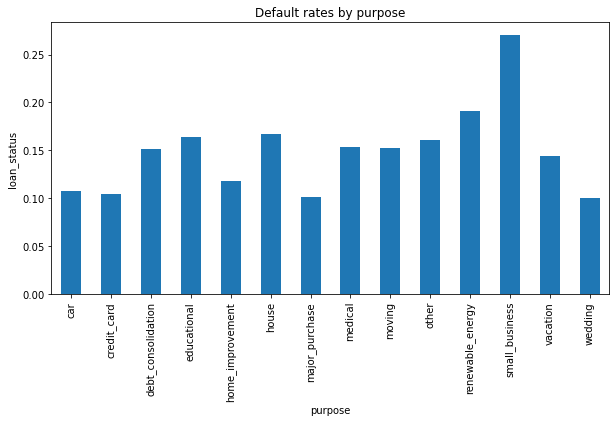

In [91]:
# bar plot to see the count of defaulters by purpose  
plt.figure(figsize=[10,5])
inp0.groupby('purpose')['loan_status'].mean().plot.bar()
plt.title('Default rates by purpose')
plt.xticks(rotation=90)
plt.ylabel('loan_status')
plt.show()

- more defaulters are from small business than renewable energy.So lenders should be careful while giving loan to small business borrowers. 

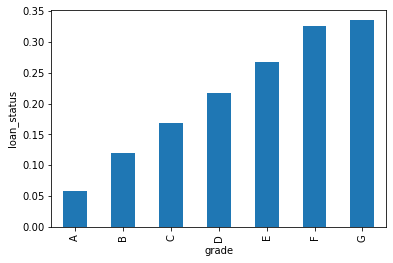

In [92]:
#default rates across grade
inp0.groupby('grade')['loan_status'].mean().plot.bar()
plt.ylabel('loan_status')
plt.show()


- more number of defaulters are in E,F,G grade and less defaulters in A grade

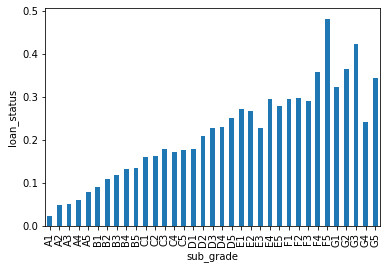

In [93]:
# bar plot to see the count of defaulters by sub grade  
inp0.groupby('sub_grade')['loan_status'].mean().plot.bar()
plt.ylabel('loan_status')
plt.show()


- As seen in grade default rate goes from A to G.
- We can see there are more defaulters from F5.

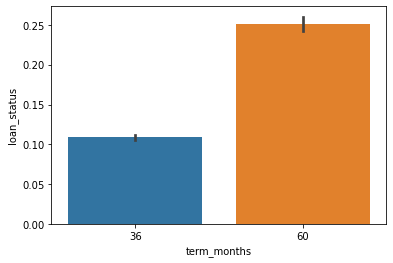

In [94]:
# default rate across term month
sns.barplot(data =inp0, x='term_months', y='loan_status')
plt.ylabel('loan_status')
plt.show()

- 60 months has more number of defaulters compared to 36 months.So while giving loan to borrowers,lenders should take care of giving loan of 60 months bcz of more defaulters,than loan giving of 60 months.

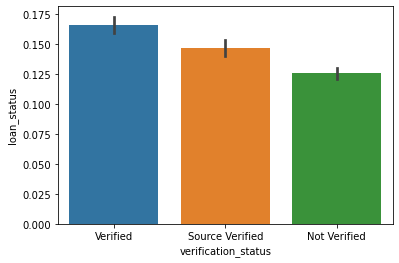

In [95]:
#default rate across verification status
sns.barplot(data=inp0,x='verification_status',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- more number of defaulters are from verified.Verified loans defaults more than not verified 

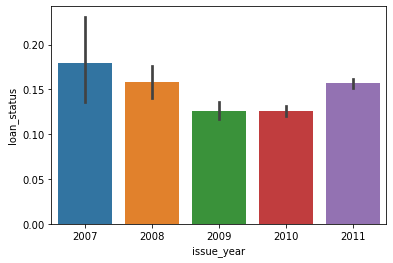

In [96]:
#default rate across year
sns.barplot(data=inp0,x='issue_year',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- there is a high defaulted rate in 2007 but after that there is decrease in default rate and suddenly increase in default rate in 2011

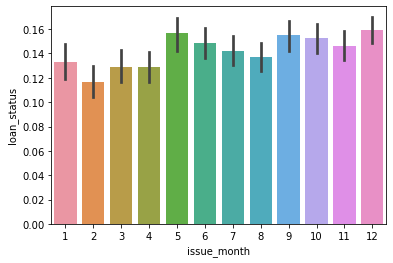

In [97]:
#default rates across months
sns.barplot(data=inp0,x='issue_month',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- not much variation across months

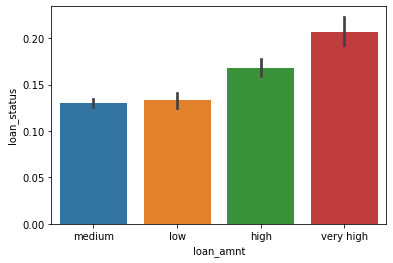

In [98]:
#loan status vs loan amount
sns.barplot(data=inp0,x='loan_amnt',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- higher the amount higher are the default rates.default rate is more in very high i.e, above 25000 amount 


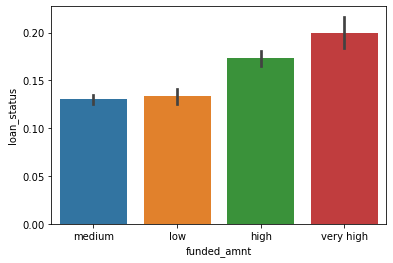

In [99]:
#default rate across funded amnt
sns.barplot(data=inp0,x='funded_amnt',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- higher the amount ,higher are the defaulters

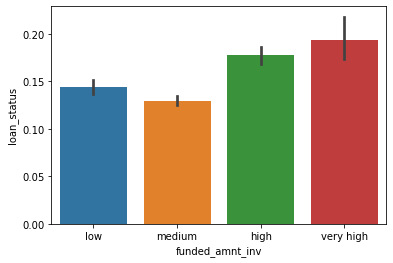

In [100]:
# default rate across funded amnt inv
sns.barplot(data=inp0,x='funded_amnt_inv',y='loan_status')
plt.ylabel('loan_status')
plt.show()

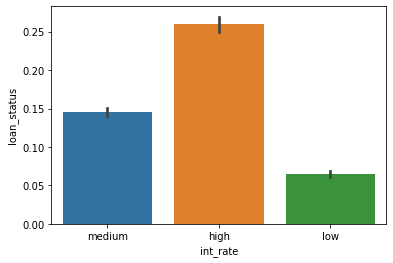

In [101]:
#default rates across int rate
sns.barplot(data=inp0,x='int_rate',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- higher the interest rate,more defaulters.Lenders must be aware while giving loan when,the interest is more then there are more chances of getting defaulted.

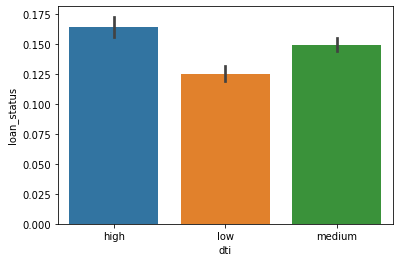

In [102]:
#default rates across dti
sns.barplot(data=inp0,x='dti',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- higher the debt to income ratio, higher is the default rate

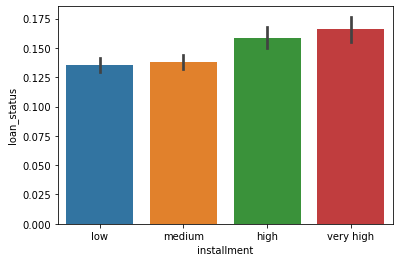

In [103]:
#default rate across installment
sns.barplot(data=inp0,x='installment',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- more installments lead to more defaults.Lenders should not allow for more instllments to the borrowers.

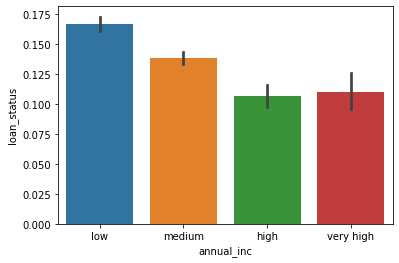

In [104]:
#loan status vs annual income
sns.barplot(data=inp0,x='annual_inc',y='loan_status')
plt.ylabel('loan_status')
plt.show()

- applicants with less salary ,defaults more,so while giving loan ,it must be taken care that borrower should have a more annual income ,so that it may lead to less defaults

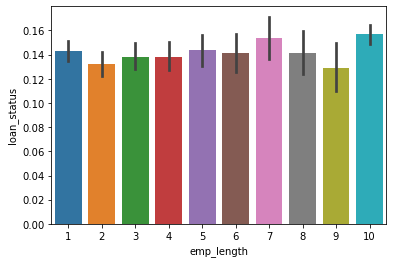

In [105]:
#loan status vs experience 
sns.barplot(data=inp0,x='emp_length',y='loan_status')
plt.show()

- not much difference

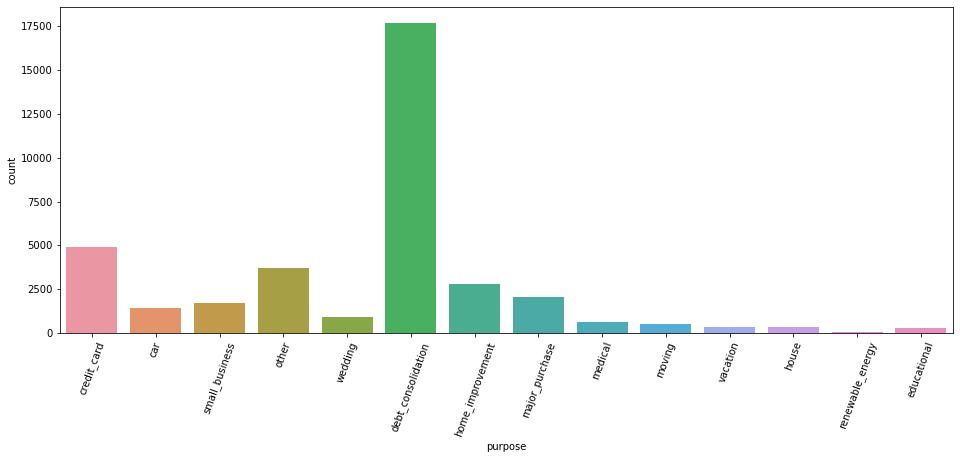

In [106]:
#purpose 
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=inp0)
plt.xticks(rotation=70)
plt.show()

- more defaulters from debt consolidation,credit card,home improvement,major purchase

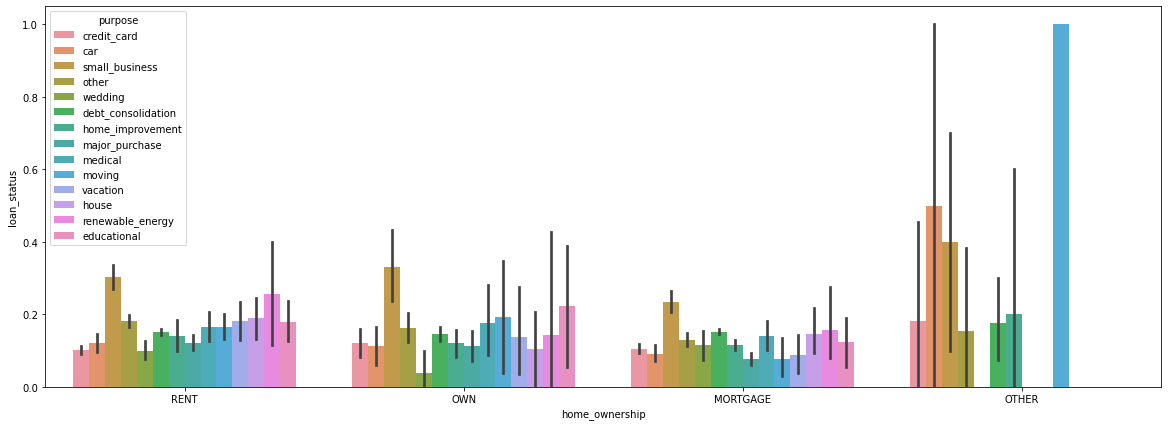

In [107]:
#purpose vs homewonership who defaulted more
plt.figure(figsize=[20,7])
sns.barplot(data=inp0, x='home_ownership',hue='purpose',y='loan_status')
plt.show()

- In general debt consolidation loans have the highest default rates.

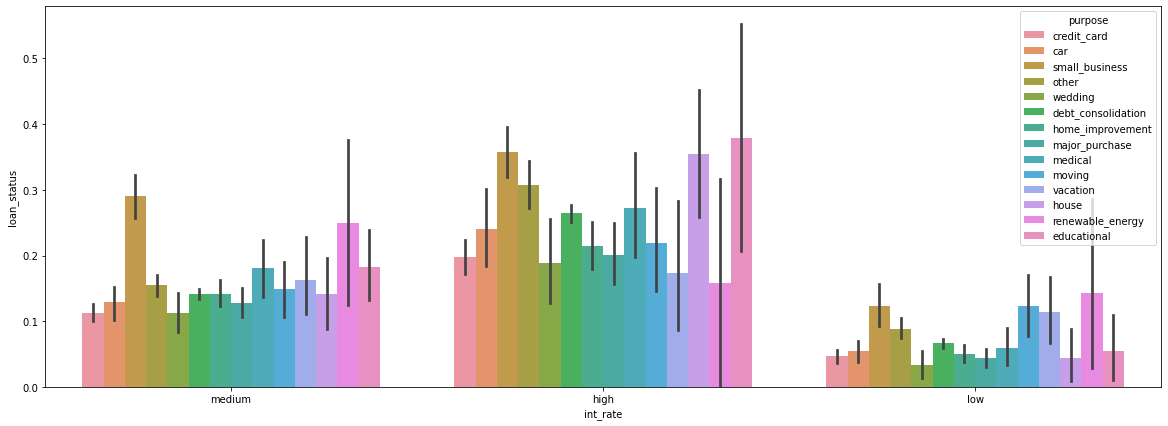

In [108]:
#purpose vs interest rate
plt.figure(figsize=[20,7])
sns.barplot(data=inp0, x='int_rate',hue='purpose',y='loan_status')
plt.show()

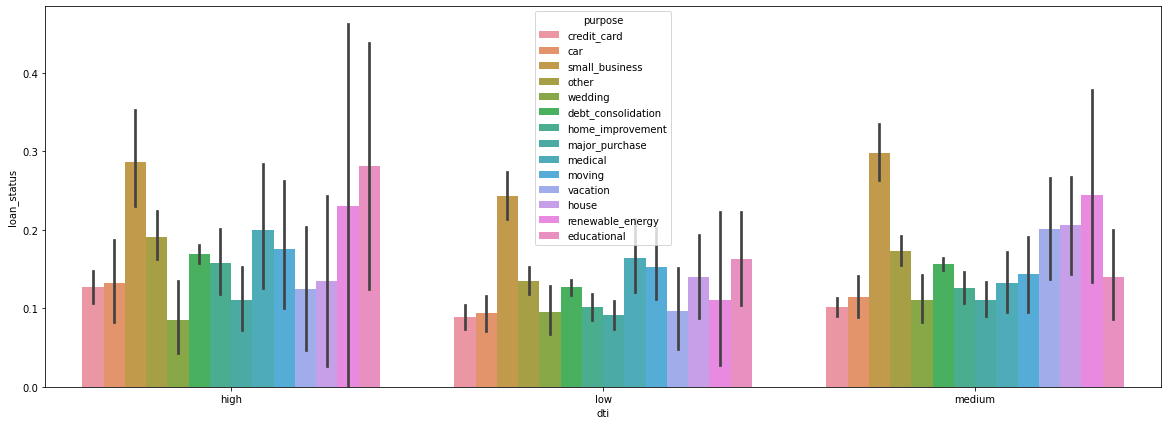

In [109]:
# dti vs purpose
plt.figure(figsize=[20,7])
sns.barplot(data=inp0, x='dti',hue='purpose',y='loan_status')
plt.show()

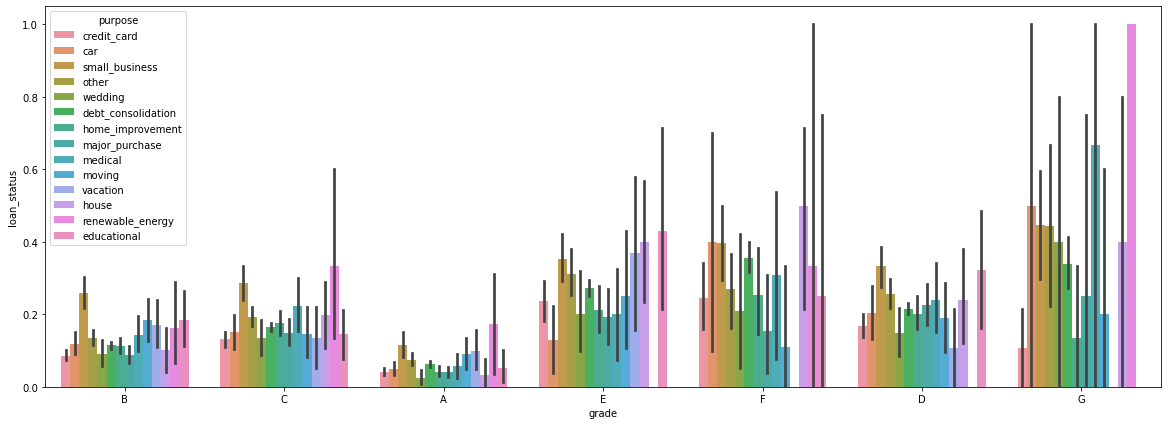

In [110]:
#purpose vs grade
plt.figure(figsize=[20,7])
sns.barplot(data=inp0, x='grade',hue='purpose',y='loan_status')
plt.show()

- We can see there are more defaulters from E,F,G grades.From 'F' grade, defaulters in purpose are more in renewable energy.
- In G grade more defaulters are from moving & car purpose.

### Default rates across different categories

#### Difference between highest and lowest default rate across the categories 

In [111]:
def diff_rate(cat_var):
    default_rates = inp0.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)
#0.06 is the default rate.Thus, there is a 6% increase in default rate as you go from high to low annual income.

annual_inc
low          0.17
medium       0.14
very high    0.11
high         0.11
Name: loan_status, dtype: float64
0.06


In [112]:
default_rates, diff = diff_rate('loan_amnt')
print(default_rates) 
print(diff)
# 8% increase in the default rate when you go from high to low loan amount

loan_amnt
very high    0.21
high         0.17
low          0.13
medium       0.13
Name: loan_status, dtype: float64
0.08


In [113]:
default_rates, diff = diff_rate('funded_amnt_inv')
print(default_rates) 
print(diff)
# 6% increase in the default rate as you go from high to low funded amount invested 

funded_amnt_inv
very high    0.19
high         0.18
low          0.14
medium       0.13
Name: loan_status, dtype: float64
0.06


In [114]:
default_rates, diff = diff_rate('verification_status')
print(default_rates) 
print(diff)
# 4% increase in default rate 

verification_status
Verified           0.17
Source Verified    0.15
Not Verified       0.13
Name: loan_status, dtype: float64
0.04


In [115]:
default_rates, diff = diff_rate('dti')
print(default_rates) 
print(diff)
# 4% increase in default rate as you go from high to low

dti
high      0.16
medium    0.15
low       0.12
Name: loan_status, dtype: float64
0.04


In [116]:
default_rates, diff = diff_rate('home_ownership')
print(default_rates) 
print(diff)
# 5% increase in default rate 

home_ownership
OTHER       0.18
RENT        0.15
OWN         0.14
MORTGAGE    0.14
Name: loan_status, dtype: float64
0.05


In [117]:
default_rates, diff = diff_rate('purpose')
print(default_rates) 
print(diff)
# 17% increase in default rate.More deafult rates from purpose variable

purpose
small_business        0.27
renewable_energy      0.19
house                 0.17
educational           0.16
other                 0.16
medical               0.15
moving                0.15
debt_consolidation    0.15
vacation              0.14
home_improvement      0.12
car                   0.11
credit_card           0.10
major_purchase        0.10
wedding               0.10
Name: loan_status, dtype: float64
0.17


In [118]:
default_rates, diff = diff_rate('sub_grade')
print(default_rates) 
print(diff)
# 46% increase in default rates,this is the highest default rate

sub_grade
F5    0.48
G3    0.42
G2    0.36
F4    0.36
G5    0.34
G1    0.32
F2    0.30
E4    0.30
F1    0.30
F3    0.29
E5    0.28
E1    0.27
E2    0.27
D5    0.25
G4    0.24
D4    0.23
D3    0.23
E3    0.23
D2    0.21
D1    0.18
C3    0.18
C5    0.18
C4    0.17
C2    0.16
C1    0.16
B5    0.14
B4    0.13
B3    0.12
B2    0.11
B1    0.09
A5    0.08
A4    0.06
A3    0.05
A2    0.05
A1    0.02
Name: loan_status, dtype: float64
0.46


In [119]:
default_rates, diff = diff_rate('grade')
print(default_rates) 
print(diff)
# 28% increase in defaulte rate 

grade
G    0.34
F    0.33
E    0.27
D    0.22
C    0.17
B    0.12
A    0.06
Name: loan_status, dtype: float64
0.28


In [120]:
default_rates, diff = diff_rate('funded_amnt')
print(default_rates) 
print(diff)
# 7% increase in default rate

funded_amnt
very high    0.20
high         0.17
low          0.13
medium       0.13
Name: loan_status, dtype: float64
0.07


In [121]:
default_rates, diff = diff_rate('installment')
print(default_rates) 
print(diff)
# 3% increase in default rate

installment
very high    0.17
high         0.16
medium       0.14
low          0.14
Name: loan_status, dtype: float64
0.03


In [122]:
default_rates, diff = diff_rate('int_rate')
print(default_rates) 
print(diff)
# 2% increase in default rate

int_rate
high      0.26
medium    0.15
low       0.06
Name: loan_status, dtype: float64
0.2


- we can conclude that more number of defaulters are from grade,sub grade & purpose.

### Defaulters 

- Home ownership :-  More number of defaulters are from Rent and Mortgage.Lenders should be careful while giving loan to borrowers of home ownership as rent and mortgage.

- Purpose :-  More defaulters are from small business than renewable energy.So lenders should be careful while giving loan to small business borrowers. 

- Grade :- More number of defaulters are in E,F,G grade and less defaulters in A grade.

- Sub grade :- There are more number of defaulters from F5.

- Term months: 60 months has more number of defaulters compared to 36 months.So while giving loan to borrowers,lenders should take care of giving loan of 60 months bcz of more defaulters,than loan giving of 60 months.

- Verification status   :- More defaulters are from verified.Verified loans defaults more than not verified.

- Issue year :- There is a high defaulted rate in 2007 but after that there is decrease in default rate and suddenly increase in default rate in 2011.

- Loan amount :- Higher the amount higher are the default rates.default rate is more in very high i.e, above 25000 amount.

- Funded amount :- Higher the amount ,higher are the defaulters.

- Interest rate :- Higher the interest rate,more defaulters.Lenders must be aware while giving loan when,the interest is more then there are more chances of getting defaulted.

- DTI : Higher the debt to income ratio, higher is the default rate.

- Installments :- More installments lead to more defaults.Lenders should not allow for more instllments to the borrowers.

- Annual Income :- Applicants with less salary ,defaults more,so while giving loan ,it must be taken care that borrower should have a good salary ,so that it may lead to less defaults.


# Conclusion
 
- Lenders can give loan to borrowers who have their own house.Applicants with own house are less likely to default. - Lenders should be careful while giving loan to borrowers for debt consolidation, small business ,credit card & renewable energy ,as they are more likely to default.
- High interest rate loans are defaulted more by borrowers.
- Applicants with less annual income defaults more.Lenders should give loan to applicants with more annual income as they are less likely to default.
- 36 months loans are less defaulted.
- A grade loans are least defaulted.I would suggest to give a loan of A grade.
- Maximum number of defaulters are from E,F,G graded loans.So it is risky to give loan of this grades.Lenders must be very careful while giving lion.
- Lenders should provide with less loan amount to reduce defaults.Higher loan amount results to more defaults.